In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/dataset_ies.csv')

In [3]:
df.head()

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


In [4]:
df.shape

(902676, 18)

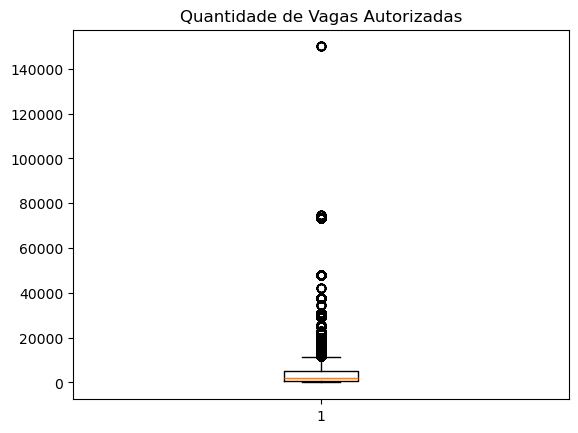

In [5]:
plt.boxplot(df['QT_VAGAS_AUTORIZADAS'])
plt.title('Quantidade de Vagas Autorizadas')
plt.show()

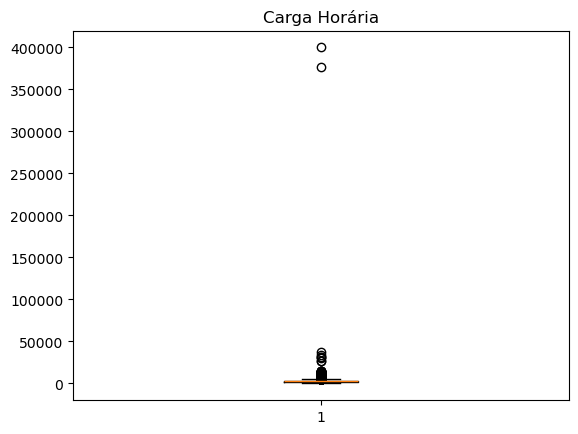

In [6]:
plt.boxplot(df['CARGA_HORARIA'])
plt.title('Carga Horária')
plt.show()

In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [8]:
df_cleaned = df.copy()
for column in ['QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA']:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

In [9]:
df_cleaned.shape

(825321, 18)

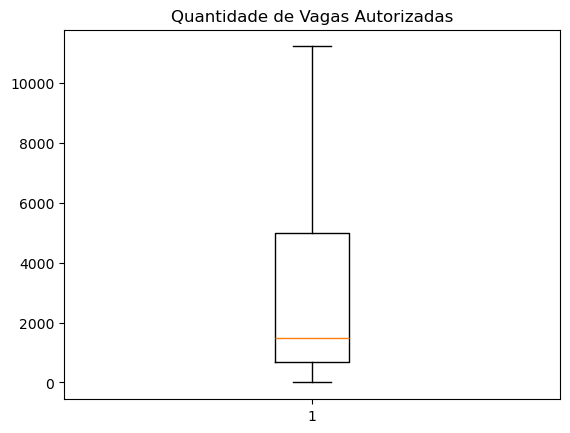

In [10]:
plt.boxplot(df_cleaned['QT_VAGAS_AUTORIZADAS'])
plt.title('Quantidade de Vagas Autorizadas')
plt.show()

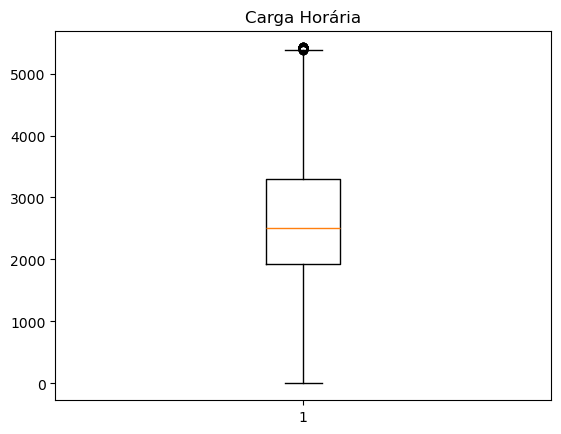

In [11]:
plt.boxplot(df_cleaned['CARGA_HORARIA'])
plt.title('Carga Horária')
plt.show()

In [12]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [13]:
df_cleaned['SITUACAO_CURSO'].value_counts() 

SITUACAO_CURSO
Em atividade    776097
Extinto          39017
Em extinção      10207
Name: count, dtype: int64